# Resumo do que será feito


*   Tratamento inicial
*   Primeiras análise (média, soma e mediana)
*	Segmentação por poluente
*	Conversão para datetime
*   Análises por ano (média e soma)
*   Valores máximos e mínimos
*	Medidas de disperção (desvio padrão, variância, quartis e boxplot)
* Visualizações por poluente e por cidade

# Importando base e tratamento inicial

In [2]:
import pandas as pd

In [7]:
df = pd.read_csv('/base_aed_airquality.csv').dropna().drop_duplicates()

In [8]:
df.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,S.José dos Campos-Jd.Satélite,Sao Paulo,BR,co,0.4,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.223646,-45.890800,1.0,POINT(-45.8908 -23.223646)
1,Taubaté,Taubaté,BR,co,0.3,2017-10-12 09:00:00.000000 UTC,ppm,Sao Paulo,-23.032350,-45.575806,1.0,POINT(-45.575806 -23.03235)
2,Grajau-Parelheiros,Sao Paulo,BR,co,0.8,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.776266,-46.696960,1.0,POINT(-46.69696 -23.776266)
3,Cerqueira César,Cerqueira César,BR,co,0.9,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.553543,-46.672707,1.0,POINT(-46.672707 -23.553543)
4,Congonhas,São Paulo,BR,co,0.5,2017-10-25 09:00:00.000000 UTC,ppm,Sao Paulo,-23.616320,-46.663467,1.0,POINT(-46.663467 -23.61632)


In [9]:
len(df)

53595

In [10]:
df.isnull().sum()

location                  0
city                      0
country                   0
pollutant                 0
value                     0
timestamp                 0
unit                      0
source_name               0
latitude                  0
longitude                 0
averaged_over_in_hours    0
location_geom             0
dtype: int64

In [11]:
df.columns

Index(['location', 'city', 'country', 'pollutant', 'value', 'timestamp',
       'unit', 'source_name', 'latitude', 'longitude',
       'averaged_over_in_hours', 'location_geom'],
      dtype='object')

In [12]:
df["location"].unique()

array(['S.José dos Campos-Jd.Satélite', 'Taubaté', 'Grajau-Parelheiros',
       'Cerqueira César', 'Congonhas', 'Ibirapuera', 'Guarulhos-Pimentas',
       'Marg.Tietê-Pte Remédios', 'Carapicuíba', 'Itaquera',
       'Capão Redondo', 'N.Senhora do Ó', 'Paulínia-Sul', 'Bauru',
       'S.José dos Campos', 'Guaratinguetá', 'Diadema',
       'São José Do Rio Preto', 'Guarulhos-Paço Municipal',
       'Santos-Ponta da Praia', 'Ribeirão Preto-Centro', 'Catanduva',
       'Mauá', 'Paulínia', 'Limeira', 'Tatuí', 'Pico do Jaraguá',
       'Jundiaí', 'Piracicaba', 'S.André-Capuava', 'S.Bernardo-Paulicéia',
       'Interlagos', 'Campinas-Taquaral', 'Cubatão-Vale do Mogi',
       'Santo Amaro', 'Araçatuba', 'Parque D.Pedro II',
       'S.Bernardo-Centro', 'Mooca', 'S.André-Paço Municipal',
       'Campinas-Centro', 'Campinas-V.União', 'Marília', 'Santos',
       'Mogi das Cruzes', 'Cubatão-Centro', 'São Caetano do Sul',
       'Pinheiros', 'Jaú', 'Cid.Universitária-USP-Ipen',
       'Taboão da Serr

In [13]:
df["city"].unique()

array(['Sao Paulo', 'Taubaté', 'Cerqueira César', 'São Paulo',
       'Guarulhos', 'Bauru', 'Diadema', 'São José Do Rio Preto', 'Santos',
       'Catanduva', 'Mauá', 'Paulínia', 'Limeira', 'Tatuí', 'Jundiaí',
       'Piracicaba', 'Santo André', 'São Bernardo do Campo', 'Campinas',
       'Cubatão', 'Araçatuba', 'Marília', 'Jaú', 'Taboão da Serra',
       'Jacareí', 'Sorocaba', 'Americana', 'Osasco', 'Araraquara',
       'Presidente Prudente', 'Santa Gertrudes', 'Perus',
       'São Caetano do Sul', 'São José dos Campos',
       'São José do Rio Preto', 'Grajaú-Parelheiros', 'Carapicuíba',
       'Ribeirão Preto', 'Paulínia-Sta Terezinha'], dtype=object)

In [14]:
df.pollutant.unique()

array(['co', 'o3', 'no2', 'so2', 'pm10', 'pm25'], dtype=object)

# Primeras análises

## Média por cidade por poluente

In [15]:
df_loc_mean = df[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).mean()
df_loc_mean

value
location   pollutant            
Americana  o3         102.000000
           pm10        16.000000
Araraquara no2          7.000000
           o3         138.000000
           pm10        24.000000
...                          ...
Taubaté    no2         16.074246
           o3          33.344111
           pm10        19.215078
           pm25        10.547672
           so2          1.000000

[243 rows x 1 columns]

## Média por poluente

In [16]:
df_mean = df[["pollutant", "value"]].groupby(["pollutant"]).mean()
df_mean.reset_index(inplace=True)
df_mean

,pollutant,value
0,co,0.454742
1,no2,25.829437
2,o3,32.961332
3,pm10,29.305548
4,pm25,14.018225
5,so2,4.972892


## Mediana por poluente

In [17]:
df_median = df[["pollutant", "value"]].groupby(["pollutant"]).median()
df_median

,value
pollutant,
co,0.3
no2,22.0
o3,30.0
pm10,24.0
pm25,11.0
so2,2.0


### Conclusão
A **mediana** está muito parecida com a **média**. Apesar de isso sugerir que os dados distribuídos simetricamente, analisaremos também medidas de dispersão. Adotaremos a média como medida de tendência central.

## Soma por poluente

In [18]:
df_sum = df[["pollutant", "value"]].groupby(["pollutant"]).sum()
df_sum.reset_index(inplace=True)
df_sum

,pollutant,value
0,co,2267.8
1,no2,220945.0
2,o3,447516.0
3,pm10,405706.0
4,pm25,125379.0
5,so2,18345.0


# Segmentação por poluente

In [19]:
ozonio = df[df["pollutant"] == "o3"]
ozonio.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
9,Itaquera,São Paulo,BR,o3,24.0,2022-04-28 07:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.580015,-46.466651,POINT(-23.58001483 1)
10,Itaquera,São Paulo,BR,o3,10.0,2022-05-09 11:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.580015,-46.466651,POINT(-23.58001483 1)
11,Capão Redondo,São Paulo,BR,o3,59.0,2022-05-25 15:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.668356,-46.780043,POINT(-23.66835615 1)
12,Itaquera,São Paulo,BR,o3,54.0,2022-05-12 20:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.580015,-46.466651,POINT(-23.58001483 1)
13,Itaquera,São Paulo,BR,o3,31.0,2022-05-04 17:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.580015,-46.466651,POINT(-23.58001483 1)


In [20]:
monox_carbon = df[df["pollutant"] == "co"]
diox_nitrogen = df[df["pollutant"] == "no2"]
diox_sulfur = df[df["pollutant"] == "so2"]
pm10 = df[df["pollutant"] == "pm10"]
pm25 = df[df["pollutant"] == "pm25"]

# Tratamento de datas

In [21]:
type(df["timestamp"][0])

str

In [22]:
from datetime import datetime

In [23]:
df_data = df['timestamp'].str.extract('(\d{4}-\d{2}-\d{2})')

Aqui percebemos uma falha na base de dados, pois os registro de 2018-2021 constam como nulos (NaN), o que não foi apontado no tratamento inicial. Enquanto não solucionarmos esse problema, não poderemos fazer uma correlação temporal.

In [24]:
df_data[0].unique()

array(['2017-10-27', '2017-10-12', '2017-10-25', '2022-04-28',
       '2022-05-09', '2022-05-25', '2022-05-12', '2022-05-04',
       '2022-04-08', '2022-05-11', '2022-04-13', '2022-05-03',
       '2022-04-29', '2022-05-10', '2022-05-07', '2022-05-15',
       '2022-05-18', '2022-05-06', '2022-05-16', '2017-10-20',
       '2022-05-14', '2022-05-02', '2022-05-20', '2022-05-13',
       '2022-04-19', '2022-04-27', '2022-05-19', '2022-05-23',
       '2022-05-05', '2022-05-17', '2022-04-30', '2022-04-06',
       '2017-08-14', '2022-04-23', '2022-05-22', '2022-04-09',
       '2022-04-10', '2022-04-18', '2022-03-30', '2022-05-08',
       '2022-04-07', '2022-05-26', '2022-04-04', '2022-05-24',
       '2022-04-15', '2022-04-26', '2022-05-21', '2022-04-24',
       '2022-04-02', '2022-04-12', '2022-04-16', '2022-04-22',
       '2022-03-31', '2017-10-26', '2022-04-03', '2022-04-20',
       '2022-04-25', '2022-04-17', '2022-04-14', '2022-04-21',
       '2017-10-13', '2017-09-26', '2022-05-01', '2017-

In [25]:
df_data[0].isnull().sum()

0

In [26]:
type(df_data[0][0])

str

In [27]:
df_aux = df_data[0]
df_data[0] = pd.to_datetime(df_data[0])

In [28]:
df_data[df_data[0] == pd.NaT]

,0


In [29]:
df["data"] = df_data[0]
df.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,data
0,S.José dos Campos-Jd.Satélite,Sao Paulo,BR,co,0.4,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.223646,-45.890800,1.0,POINT(-45.8908 -23.223646),2017-10-27
1,Taubaté,Taubaté,BR,co,0.3,2017-10-12 09:00:00.000000 UTC,ppm,Sao Paulo,-23.032350,-45.575806,1.0,POINT(-45.575806 -23.03235),2017-10-12
2,Grajau-Parelheiros,Sao Paulo,BR,co,0.8,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.776266,-46.696960,1.0,POINT(-46.69696 -23.776266),2017-10-27
3,Cerqueira César,Cerqueira César,BR,co,0.9,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.553543,-46.672707,1.0,POINT(-46.672707 -23.553543),2017-10-27
4,Congonhas,São Paulo,BR,co,0.5,2017-10-25 09:00:00.000000 UTC,ppm,Sao Paulo,-23.616320,-46.663467,1.0,POINT(-46.663467 -23.61632),2017-10-25


In [30]:
df_aux = pd.DataFrame(df_aux)
df_aux

,0
0,2017-10-27
1,2017-10-12
2,2017-10-27
3,2017-10-27
4,2017-10-25
...,...
53590,2022-05-09
53591,2022-05-08
53592,2022-05-08
53593,2022-05-14


In [31]:
df_ano = df_aux[0].str.extract('(\d{4})')
df_ano.head()

,0
0,2017
1,2017
2,2017
3,2017
4,2017


In [32]:
df["ano"] = df_ano.astype(int)
df.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,data,ano
0,S.José dos Campos-Jd.Satélite,Sao Paulo,BR,co,0.4,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.223646,-45.890800,1.0,POINT(-45.8908 -23.223646),2017-10-27,2017
1,Taubaté,Taubaté,BR,co,0.3,2017-10-12 09:00:00.000000 UTC,ppm,Sao Paulo,-23.032350,-45.575806,1.0,POINT(-45.575806 -23.03235),2017-10-12,2017
2,Grajau-Parelheiros,Sao Paulo,BR,co,0.8,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.776266,-46.696960,1.0,POINT(-46.69696 -23.776266),2017-10-27,2017
3,Cerqueira César,Cerqueira César,BR,co,0.9,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.553543,-46.672707,1.0,POINT(-46.672707 -23.553543),2017-10-27,2017
4,Congonhas,São Paulo,BR,co,0.5,2017-10-25 09:00:00.000000 UTC,ppm,Sao Paulo,-23.616320,-46.663467,1.0,POINT(-46.663467 -23.61632),2017-10-25,2017


In [33]:
type(df["ano"][0])

numpy.int64

In [34]:
df_naonulo = df.query("ano == 2017 or ano == 2022")
df_naonulo.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom,data,ano
0,S.José dos Campos-Jd.Satélite,Sao Paulo,BR,co,0.4,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.223646,-45.890800,1.0,POINT(-45.8908 -23.223646),2017-10-27,2017
1,Taubaté,Taubaté,BR,co,0.3,2017-10-12 09:00:00.000000 UTC,ppm,Sao Paulo,-23.032350,-45.575806,1.0,POINT(-45.575806 -23.03235),2017-10-12,2017
2,Grajau-Parelheiros,Sao Paulo,BR,co,0.8,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.776266,-46.696960,1.0,POINT(-46.69696 -23.776266),2017-10-27,2017
3,Cerqueira César,Cerqueira César,BR,co,0.9,2017-10-27 18:00:00.000000 UTC,ppm,Sao Paulo,-23.553543,-46.672707,1.0,POINT(-46.672707 -23.553543),2017-10-27,2017
4,Congonhas,São Paulo,BR,co,0.5,2017-10-25 09:00:00.000000 UTC,ppm,Sao Paulo,-23.616320,-46.663467,1.0,POINT(-46.663467 -23.61632),2017-10-25,2017


In [35]:
len(df_naonulo)

53595

## Os maior e menor anos no registro

In [36]:
df["data"].max()

Timestamp('2022-05-26 00:00:00')

In [37]:
df["data"].min()

Timestamp('2017-08-14 00:00:00')

# Mais análises

## Emissões médias por ano por poluente

In [38]:
df_mean = df[["ano", "pollutant", "value"]].groupby(["ano", "pollutant"]).mean()
df_mean

value
ano  pollutant           
2017 co          0.688000
     no2        37.517241
     o3         75.296296
     pm10       41.438596
     pm25       33.136364
     so2         4.611111
2022 co          0.453567
     no2        25.749647
     o3         32.792280
     pm10       29.255386
     pm25       13.971083
     so2         4.974666

## Emissões totais por ano por poluente

In [39]:
df_ano_sum = df[["ano", "pollutant", "value"]].groupby(["ano", "pollutant"]).sum()
df_ano_sum

value
ano  pollutant          
2017 co             17.2
     no2          2176.0
     o3           4066.0
     pm10         2362.0
     pm25          729.0
     so2            83.0
2022 co           2250.6
     no2        218769.0
     o3         443450.0
     pm10       403344.0
     pm25       124650.0
     so2         18262.0

## Emissões máxima e mínima por poluente

| **Poluente** | **Local**                            | **Ano** |
|--------------|--------------------------------------|---------|
| O3           | Pinheiros, São Paulo, SP             | 2022    |
| CO2          | Taboão da Serra, Taboão da Serra, SP | 2022    |
| NO2          | Osasco, Osasco, SP                   | 2022    |
| SO2          | Cubatão, Cubatão, SP                 | 2022    |
| PM10         | Cubatão, Cubatão, SP                 | 2022    |
| PM25         | Limeira, Limeira, SP                 | 2022    |

*Tabela 1: Localidades que emitiram concentração máxima por poluente*

As localizações que registraram menor emissão estão listadas nos códigos abaixo.

### Ozônio

In [40]:
ozonio_maxmin = [ozonio["value"].min(), ozonio["value"].max()]
ozonio_maxmin

[0.0, 790.0]

In [41]:
ozonio[ozonio["value"] == ozonio_maxmin[1]]

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
40924,Pinheiros,São Paulo,BR,o3,790.0,2022-05-15 08:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.56146,-46.702017,POINT(-23.56145989 1)


In [42]:
ozonio_min = ozonio[ozonio["value"] == ozonio_maxmin[0]]
ozonio_min.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
848,Capão Redondo,São Paulo,BR,o3,0.0,2022-05-03 08:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.668356,-46.780043,POINT(-23.66835615 1)
1611,N.Senhora do Ó,São Paulo,BR,o3,0.0,2022-04-26 04:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.480099,-46.692052,POINT(-23.48009871 1)
1632,N.Senhora do Ó,São Paulo,BR,o3,0.0,2022-04-29 06:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.480099,-46.692052,POINT(-23.48009871 1)
8995,Jundiaí,Jundiaí,BR,o3,0.0,2022-05-04 05:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.192004,-46.897097,POINT(-23.19200374 1)
9007,Jundiaí,Jundiaí,BR,o3,0.0,2022-05-03 10:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.192004,-46.897097,POINT(-23.19200374 1)


Localizações que registraram menor emissão de **ozônio**:

In [43]:
ozonio_min["location"].unique()

array(['Capão Redondo', 'N.Senhora do Ó', 'Jundiaí', 'Santos',
       'Guarulhos-Pimentas', 'São Caetano do Sul', 'Tatuí',
       'S.José Campos-Jd.Satelite', 'Bauru', 'São José do Rio Preto',
       'Santos-Ponta da Praia', 'Grajaú-Parelheiros',
       'Cid.Universitária-USP-Ipen', 'Guarulhos-Paço Municipal',
       'Carapicuíba', 'Sorocaba', 'Pinheiros', 'Araçatuba',
       'Cubatão-Centro', 'Paulínia', 'Campinas-Taquaral', 'Taubaté',
       'Paulínia-Sta Terezinha'], dtype=object)

### Monóxido de carbono

In [44]:
monox_carbon_maxmin = [monox_carbon["value"].min(), monox_carbon["value"].max()]
monox_carbon_maxmin

[0.0, 4.4]

In [45]:
monox_carbon[monox_carbon["value"] == monox_carbon_maxmin[1]]

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
14112,Taboão da Serra,Taboão da Serra,BR,co,4.4,2022-05-25 02:00:00.000000 UTC,ppm,Sao Paulo CETESB,1.0,-23.609324,-46.758294,POINT(-23.60932386 1)


In [46]:
monox_carbon_min = monox_carbon[monox_carbon["value"] == monox_carbon_maxmin[0]]
monox_carbon_min.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
4068,Osasco,Osasco,BR,co,0.0,2022-05-18 06:00:00.000000 UTC,ppm,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
4516,Osasco,Osasco,BR,co,0.0,2022-05-17 17:00:00.000000 UTC,ppm,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
4593,Osasco,Osasco,BR,co,0.0,2022-05-17 20:00:00.000000 UTC,ppm,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
5072,Osasco,Osasco,BR,co,0.0,2022-05-18 02:00:00.000000 UTC,ppm,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
5574,Osasco,Osasco,BR,co,0.0,2022-05-18 07:00:00.000000 UTC,ppm,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)


Localizações que registraram menor emissão de **monóxido de carbono**:

In [47]:
monox_carbon_min["location"].unique()

array(['Osasco', 'Taboão da Serra', 'S.José Campos-Jd.Satelite',
       'S.Bernardo-Centro', 'Ribeirão Preto', 'Mooca',
       'Marg.Tietê-Pte Remédios'], dtype=object)

### Dióxido de nitrogênio

In [48]:
diox_nitrogen_maxmin = [diox_nitrogen["value"].min(), diox_nitrogen["value"].max()]
diox_nitrogen_maxmin

[0.0, 144.0]

In [49]:
diox_nitrogen[diox_nitrogen["value"] == diox_nitrogen_maxmin[1]]

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
5171,Osasco,Osasco,BR,no2,144.0,2022-05-20 21:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)


In [50]:
diox_nitrogen_min = diox_nitrogen[diox_nitrogen["value"] == diox_nitrogen_maxmin[0]]
diox_nitrogen_min.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
2839,Limeira,Limeira,BR,no2,0.0,2022-05-22 17:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-22.563604,-47.414314,POINT(-22.56360378 1)
3695,Limeira,Limeira,BR,no2,0.0,2022-05-08 18:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-22.563604,-47.414314,POINT(-22.56360378 1)
4108,Osasco,Osasco,BR,no2,0.0,2022-04-22 02:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
20353,Tatuí,Tatuí,BR,no2,0.0,2022-04-29 19:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.360752,-47.870799,POINT(-23.36075154 1)
20375,Tatuí,Tatuí,BR,no2,0.0,2022-04-30 02:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.360752,-47.870799,POINT(-23.36075154 1)


Localizações que registraram menor emissão de **dióxido de nitrogênio**:

In [51]:
diox_nitrogen_min["location"].unique()

array(['Limeira', 'Osasco', 'Tatuí', 'Ribeirão Preto', 'Sorocaba',
       'Paulínia'], dtype=object)

### Dióxido de enxofre

In [52]:
diox_sulfur_maxmin = [diox_sulfur["value"].min(), diox_sulfur["value"].max()]
diox_sulfur_maxmin

[0.0, 114.0]

In [53]:
diox_sulfur[diox_sulfur["value"] == diox_sulfur_maxmin[1]]

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
8754,Cubatão-V.Parisi,Cubatão,BR,so2,114.0,2022-05-26 09:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.849416,-46.388676,POINT(-23.84941617 1)


In [54]:
diox_sulfur_min = diox_sulfur[diox_sulfur["value"] == diox_sulfur_maxmin[0]]
diox_sulfur_min.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
4170,Osasco,Osasco,BR,so2,0.0,2022-04-20 04:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
4195,Osasco,Osasco,BR,so2,0.0,2022-04-15 04:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
4206,Osasco,Osasco,BR,so2,0.0,2022-05-04 16:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
4217,Osasco,Osasco,BR,so2,0.0,2022-04-13 04:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)
4231,Osasco,Osasco,BR,so2,0.0,2022-04-17 04:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.526721,-46.792078,POINT(-23.52672142 1)


Localizações que registraram menor emissão de **dióxido de enxofre**:

In [55]:
diox_sulfur_min["location"].unique()

array(['Osasco', 'Guarulhos-Pimentas', 'São Caetano do Sul',
       'Santos-Ponta da Praia', 'Cubatão-Centro', 'Paulínia',
       'Cubatão-Vale do Mogi', 'Marg.Tietê-Pte Remédios'], dtype=object)

### PM10

In [56]:
pm10_maxmin = [pm10["value"].min(), pm10["value"].max()]
pm10_maxmin

[0.0, 454.0]

In [57]:
pm10[pm10["value"] == pm10_maxmin[1]]

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
43959,Cubatão-Centro,Cubatão,BR,pm10,454.0,2022-05-13 17:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-23.879027,-46.418483,POINT(-23.87902673 1)


In [58]:
pm10_min = pm10[pm10["value"] == pm10_maxmin[0]]
pm10_min.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
641,Itaim Paulista,São Paulo,BR,pm10,0.0,2017-10-27 18:00:00.000000 UTC,µg/m³,Sao Paulo,-23.501547,-46.420740,1.000000,POINT(-46.42074 -23.501547)
896,Piracicaba,Piracicaba,BR,pm10,0.0,2017-10-26 15:00:00.000000 UTC,µg/m³,Sao Paulo,-22.701221,-47.649654,1.000000,POINT(-47.649654 -22.701221)
1013,Capão Redondo,São Paulo,BR,pm10,0.0,2022-05-04 16:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.000000,-23.668356,-46.780043,POINT(-23.66835615 1)
1271,Capão Redondo,São Paulo,BR,pm10,0.0,2022-04-30 17:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.000000,-23.668356,-46.780043,POINT(-23.66835615 1)
1521,N.Senhora do Ó,São Paulo,BR,pm10,0.0,2022-04-17 04:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.000000,-23.480099,-46.692052,POINT(-23.48009871 1)


Localizações que registraram menor emissão de **PM10**:

In [59]:
pm10_min["location"].unique()

array(['Itaim Paulista', 'Piracicaba', 'Capão Redondo', 'N.Senhora do Ó',
       'Osasco', 'Perus', 'Santos', 'Parque D.Pedro II',
       'Guarulhos-Pimentas', 'São Caetano do Sul', 'Tatuí',
       'S.José Campos-Jd.Satelite', 'Bauru', 'São José do Rio Preto',
       'Santos-Ponta da Praia', 'Guarulhos-Paço Municipal', 'Carapicuíba',
       'Sorocaba', 'Pinheiros', 'Cubatão-Centro', 'Campinas-Taquaral',
       'Mooca', 'Cubatão-Vale do Mogi', 'Taubaté'], dtype=object)

### PM2.5

In [60]:
pm25_maxmin = [pm25["value"].min(), pm25["value"].max()]
pm25_maxmin

[0.0, 862.0]

In [61]:
pm25[pm25["value"] == pm25_maxmin[1]]

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
3087,Limeira,Limeira,BR,pm25,862.0,2022-04-27 16:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.0,-22.563604,-47.414314,POINT(-22.56360378 1)


In [62]:
pm25_min = pm25[pm25["value"] == pm25_maxmin[0]]
pm25_min.head()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
343,Grajau-Parelheiros,Sao Paulo,BR,pm25,0.0,2017-10-26 08:00:00.000000 UTC,µg/m³,Sao Paulo,-23.776266,-46.696960,1.000000,POINT(-46.69696 -23.776266)
2572,Limeira,Limeira,BR,pm25,0.0,2022-04-18 04:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.000000,-22.563604,-47.414314,POINT(-22.56360378 1)
2590,Limeira,Limeira,BR,pm25,0.0,2022-04-30 11:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.000000,-22.563604,-47.414314,POINT(-22.56360378 1)
2599,Limeira,Limeira,BR,pm25,0.0,2022-05-17 20:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.000000,-22.563604,-47.414314,POINT(-22.56360378 1)
2611,Limeira,Limeira,BR,pm25,0.0,2022-05-18 02:00:00.000000 UTC,µg/m³,Sao Paulo CETESB,1.000000,-22.563604,-47.414314,POINT(-22.56360378 1)


Localizações que registraram menor emissão de **PM2.5**:

In [63]:
pm25_min["location"].unique()

array(['Grajau-Parelheiros', 'Limeira', 'Osasco', 'Campinas-V.União',
       'Perus', 'Jundiaí', 'Parque D.Pedro II', 'Santana',
       'Guarulhos-Pimentas', 'São Caetano do Sul',
       'S.José Campos-Jd.Satelite', 'São José do Rio Preto',
       'Santos-Ponta da Praia', 'Grajaú-Parelheiros',
       'Cid.Universitária-USP-Ipen', 'Guarulhos-Paço Municipal',
       'S.Bernardo-Centro', 'Santa Gertrudes', 'Ribeirão Preto',
       'Pinheiros', 'Mooca', 'Taubaté', 'Paulínia-Sta Terezinha'],
      dtype=object)

## Maiores e menores emissões médias e totais

### Ozônio

**Araraquara** e **Ribeirão preto** possuem as maiores emissões de ozônio, média e total, respectivamente. **Cubatão** e **Santo Amaro** possuem as menores emissão de ozônio, média e total, respectivamente.

In [64]:
df_mean_ozonio = ozonio[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).mean().reset_index()
df_mean_max_ozonio = df_mean_ozonio.max().values[0]
df_mean_min_ozonio = df_mean_ozonio.min().values[0]
df_total_ozonio = ozonio[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).sum().reset_index()
df_total_max_ozonio = df_total_ozonio.max().values[0]
df_total_min_ozonio = df_total_ozonio.min().values[0]
df_mean_ozonio = pd.DataFrame(df_mean_ozonio)
df_total_ozonio = pd.DataFrame(df_total_ozonio)

In [65]:
df_mean_ozonio.reset_index(inplace = True)
df_total_ozonio.reset_index(inplace = True)

In [66]:
df_mean_ozonio.head()

,index,location,pollutant,value
0,0,Americana,o3,102.000000
1,1,Araraquara,o3,138.000000
2,2,Araçatuba,o3,40.050808
3,3,Bauru,o3,32.731308
4,4,Campinas-Taquaral,o3,40.135468


In [67]:
df_mean_ozonio[df_mean_ozonio["value"] == df_mean_max_ozonio]

,index,location,pollutant,value


In [68]:
df_mean_ozonio[df_mean_ozonio["value"] == df_mean_min_ozonio]

,index,location,pollutant,value


In [69]:
df_total_ozonio[df_total_ozonio["value"] == df_total_max_ozonio]

,index,location,pollutant,value


In [70]:
df_total_ozonio[df_total_ozonio["value"] == df_total_min_ozonio]

,index,location,pollutant,value


### Monóxido de carbono
**Santo André** e **Taboão da Serra** possuem as maiores emissões de ozônio, média e total, respectivamente. **Ibirapuera*** possui as menores emissão de **monóxido de carbono**, média e total.

In [71]:
df_mean_monox_carbon = monox_carbon[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).mean().reset_index()
df_mean_max_monox_carbon = df_mean_monox_carbon.max().values[0]
df_mean_min_monox_carbon = df_mean_monox_carbon.min().values[0]
df_total_monox_carbon = monox_carbon[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).sum().reset_index()
df_total_max_monox_carbon = df_total_monox_carbon.max().values[0]
df_total_min_monox_carbon = df_total_monox_carbon.min().values[0]
df_mean_monox_carbon = pd.DataFrame(df_mean_monox_carbon)
df_total_monox_carbon = pd.DataFrame(df_total_monox_carbon)

In [72]:
df_mean_monox_carbon.reset_index(inplace = True)
df_total_monox_carbon.reset_index(inplace = True)
df_mean_monox_carbon

,index,location,pollutant,value
0,0,Campinas-Centro,co,0.800000
1,1,Campinas-V.União,co,0.400000
2,2,Carapicuíba,co,0.442529
3,3,Cerqueira César,co,0.900000
4,4,Congonhas,co,0.500000
5,5,Grajau-Parelheiros,co,0.800000
6,6,Grajaú-Parelheiros,co,0.384971
7,7,Guarulhos-Pimentas,co,0.460432
8,8,Ibirapuera,co,0.100000
9,9,Marg.Tietê-Pte Remédios,co,0.256436


In [73]:
df_mean_monox_carbon[df_mean_monox_carbon["value"] == df_mean_max_monox_carbon]

,index,location,pollutant,value


In [74]:
df_mean_monox_carbon[df_mean_monox_carbon["value"] == df_mean_min_monox_carbon]

,index,location,pollutant,value


In [75]:
df_total_monox_carbon[df_total_monox_carbon["value"] == df_total_max_monox_carbon]

,index,location,pollutant,value


In [76]:
df_total_monox_carbon[df_total_monox_carbon["value"] == df_total_min_monox_carbon]

,index,location,pollutant,value


### Dióxido de nitrogênio
**Cerqueira César** e **Cubatão** possuem as maiores emissões de ozônio, média e total, respectivamente. **Catanduva** possui as menores emissão de **dióxido de nitrogênio**, média e total.

In [77]:
df_mean_diox_nitrogen = diox_nitrogen[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).mean().reset_index()
df_mean_max_diox_nitrogen = df_mean_diox_nitrogen.max().values[0]
df_mean_min_diox_nitrogen = df_mean_diox_nitrogen.min().values[0]
df_total_diox_nitrogen = diox_nitrogen[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).sum().reset_index()
df_total_max_diox_nitrogen = df_total_diox_nitrogen.max().values[0]
df_total_min_diox_nitrogen = df_total_diox_nitrogen.min().values[0]
df_mean_diox_nitrogen = pd.DataFrame(df_mean_diox_nitrogen)
df_total_diox_nitrogen = pd.DataFrame(df_total_diox_nitrogen)

In [78]:
df_mean_diox_nitrogen.reset_index(inplace = True)
df_total_diox_nitrogen.reset_index(inplace = True)

In [79]:
df_mean_diox_nitrogen[df_mean_diox_nitrogen["value"] == df_mean_max_diox_nitrogen]

,index,location,pollutant,value


In [80]:
df_mean_diox_nitrogen[df_mean_diox_nitrogen["value"] == df_mean_min_diox_nitrogen]

,index,location,pollutant,value


In [81]:
df_total_diox_nitrogen[df_total_diox_nitrogen["value"] == df_total_max_diox_nitrogen]

,index,location,pollutant,value


In [82]:
df_total_diox_nitrogen[df_total_diox_nitrogen["value"] == df_total_min_diox_nitrogen]

,index,location,pollutant,value


### Dióxido de enxofre
**São José dos Campos** e **Cubatão** possuem as maiores emissões de ozônio, média e total, respectivamente. **Cerqueira César, Santo André e Taubaté** possuem as menores médias de emissão. **Cerqueria César e Santo André** possuem os menores totais de emissão.

In [83]:
df_mean_diox_sulfur = diox_sulfur[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).mean().reset_index()
df_mean_max_diox_sulfur = df_mean_diox_sulfur.max().values[0]
df_mean_min_diox_sulfur = df_mean_diox_sulfur.min().values[0]
df_total_diox_sulfur = diox_sulfur[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).sum().reset_index()
df_total_max_diox_sulfur = df_total_diox_sulfur.max().values[0]
df_total_min_diox_sulfur = df_total_diox_sulfur.min().values[0]
df_mean_diox_sulfur = pd.DataFrame(df_mean_diox_sulfur)
df_total_diox_sulfur = pd.DataFrame(df_total_diox_sulfur)

In [84]:
df_mean_diox_sulfur.reset_index(inplace = True)
df_total_diox_sulfur.reset_index(inplace = True)
df_mean_diox_sulfur

,index,location,pollutant,value
0,0,Cerqueira César,so2,1.000000
1,1,Congonhas,so2,2.000000
2,2,Cubatão-Centro,so2,11.016588
3,3,Cubatão-V.Parisi,so2,11.162528
4,4,Cubatão-Vale do Mogi,so2,6.814727
5,5,Guarulhos-Pimentas,so2,2.556075
6,6,Interlagos,so2,2.000000
7,7,Marg.Tietê-Pte Remédios,so2,1.948718
8,8,Osasco,so2,2.118451
9,9,Paulínia,so2,2.038902


In [85]:
df_mean_diox_sulfur[df_mean_diox_sulfur["value"] == df_mean_max_diox_sulfur]

,index,location,pollutant,value


In [86]:
df_mean_diox_sulfur[df_mean_diox_sulfur["value"] == df_mean_min_diox_sulfur]

,index,location,pollutant,value


In [87]:
df_total_diox_sulfur[df_total_diox_sulfur["value"] == df_total_max_diox_sulfur]

,index,location,pollutant,value


In [88]:
df_total_diox_sulfur[df_total_diox_sulfur["value"] == df_total_min_diox_sulfur]

,index,location,pollutant,value


### PM10

**Paulínia** e **Cubatão** possuem as maiores emissões de **PM10**, média e total, respectivamente. **Itaim Paulista** e **Piraciba** possuem ambos as menores emissões de **PM10**, média e total.

In [89]:
df_mean_pm10 = pm10[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).mean().reset_index()
df_mean_max_pm10 = df_mean_pm10.max().values[0]
df_mean_min_pm10 = df_mean_pm10.min().values[0]
df_total_pm10 = pm10[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).sum().reset_index()
df_total_max_pm10 = df_total_pm10.max().values[0]
df_total_min_pm10 = df_total_pm10.min().values[0]
df_mean_pm10 = pd.DataFrame(df_mean_pm10)
df_total_pm10 = pd.DataFrame(df_total_pm10)

In [90]:
df_mean_pm10.reset_index(inplace = True)
df_total_pm10.reset_index(inplace = True)

In [91]:
df_mean_pm10[df_mean_pm10["value"] == df_mean_max_pm10]

,index,location,pollutant,value


In [92]:
df_mean_pm10[df_mean_pm10["value"] == df_mean_min_pm10]

,index,location,pollutant,value


In [93]:
df_total_pm10[df_total_pm10["value"] == df_total_max_pm10]

,index,location,pollutant,value


In [94]:
df_total_pm10[df_total_pm10["value"] == df_total_min_pm10]

,index,location,pollutant,value


### PM2.5
**Pico do Jaraguá e Osasco** possuem as maiores emissões de **PM2.5**, média e total, respectivamente. **Grajaú-Parelheiros** possui as menores emissões de **PM2.5**, média e total.

In [95]:
df_mean_pm25 = pm25[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).mean().reset_index()
df_mean_max_pm25 = df_mean_pm25["value"].max()
df_mean_min_pm25 = df_mean_pm25["value"].min()
df_total_pm25 = pm25[["location", "pollutant", "value"]].groupby(["location", "pollutant"]).sum().reset_index()
df_total_max_pm25 = df_total_pm25["value"].max()
df_total_min_pm25 = df_total_pm25["value"].min()
df_mean_pm25 = pd.DataFrame(df_mean_pm25)
df_total_pm25 = pd.DataFrame(df_total_pm25)

In [96]:
df_mean_pm25.reset_index(inplace = True)
df_total_pm25.reset_index(inplace = True)

In [97]:
df_mean_pm25[df_mean_pm25["value"] == df_mean_max_pm25]

,index,location,pollutant,value
17,17,Pico do Jaraguá,pm25,59.0


In [98]:
df_mean_pm25[df_mean_pm25["value"] == df_mean_min_pm25]

,index,location,pollutant,value
3,3,Grajau-Parelheiros,pm25,0.0


In [99]:
df_total_pm25[df_total_pm25["value"] == df_total_max_pm25]

,index,location,pollutant,value
13,13,Osasco,pm25,9213.0


In [100]:
df_total_pm25[df_total_pm25["value"] == df_total_min_pm25]

,index,location,pollutant,value
3,3,Grajau-Parelheiros,pm25,0.0


# Medidas de dispersão

In [101]:
import numpy as np

## Desvio padrão e variância

### Ozônio

In [102]:
ozonio["value"].mean()

32.96133166384327

Os dados tendem a se afastar em 25 unidades da média.

In [103]:
np.std(ozonio["value"])

25.001776027543553

In [104]:
np.var(ozonio["value"])

625.0888045314515

### Monóxido de carbono

In [105]:
monox_carbon["value"].mean()

0.45474233005815123

Os dados tendem a se afastar em 0.40 unidades da média.

In [106]:
np.std(monox_carbon["value"])

0.4073259706172774

In [107]:
np.var(monox_carbon["value"])

0.16591444633930713

### Dióxido de nitrogênio

In [108]:
diox_nitrogen["value"].mean()

25.82943652092588

Os dados tendem a se afastar em 19 unidades da média.

In [109]:
np.std(diox_nitrogen["value"])

19.283228407401634

In [110]:
np.var(diox_nitrogen["value"])

371.84289781202136

### Dióxido de enxofre

In [111]:
diox_sulfur["value"].mean()

4.9728923827595555

Os dados tendem a se afastar em 10 unidades da média.

In [112]:
np.std(diox_sulfur["value"])

9.678559599576118

In [113]:
np.var(diox_sulfur["value"])

93.67451592254703

### PM10

In [114]:
pm10["value"].mean()

29.30554752961572

Os dados tendem a se afastar em 24 unidades da média.

In [115]:
np.std(pm10["value"])

23.786520961527202

In [116]:
np.var(pm10["value"])

565.7985794531729

### PM2.5

In [117]:
pm25["value"].mean()

14.01822450805009

Os dados tendem a se afastar em 15 unidades da média.

In [118]:
np.std(pm25["value"])

14.92909609669802

In [119]:
np.var(pm25["value"])

222.87791026444407

## Quartis

In [120]:
import matplotlib.pyplot as plt

### Ozônio

In [121]:
ozonio["value"].describe()

count    13577.000000
mean        32.961332
std         25.002697
min          0.000000
25%         15.000000
50%         30.000000
75%         46.000000
max        790.000000
Name: value, dtype: float64

In [122]:
ozonio_q1,ozonio_q3 = np.quantile(ozonio["value"].dropna(), [0.25,0.75])
ozonio_iqr = ozonio_q3 - ozonio_q1 #distancia interquartil
print(ozonio_iqr)

31.0


#### Número de outliers

In [123]:
ozonio[ozonio.value > ozonio_q3 + 1.5*ozonio_iqr].count()

location                  249
city                      249
country                   249
pollutant                 249
value                     249
timestamp                 249
unit                      249
source_name               249
latitude                  249
longitude                 249
averaged_over_in_hours    249
location_geom             249
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9a8e8fa9e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9a8e8faf20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9a8e8fa740>],
 'medians': [<matplotlib.lines.Line2D at 0x7b9a8e8fb460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b9a8e8fb700>],
 'means': []}

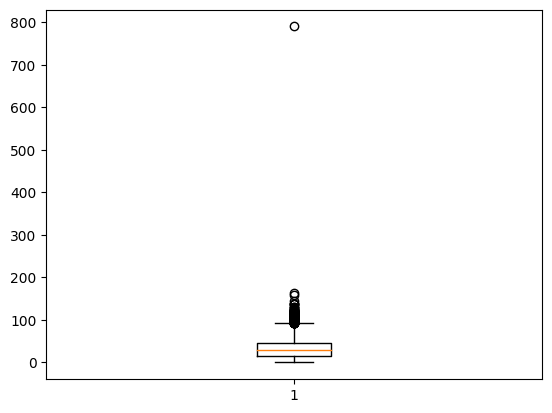

In [124]:
ozonio_fig, ozonio_ax = plt.subplots()
ozonio_ax.boxplot(ozonio.value)

### Monóxido de carbono

In [125]:
monox_carbon["value"].describe()

count    4987.000000
mean        0.454742
std         0.407367
min         0.000000
25%         0.200000
50%         0.300000
75%         0.500000
max         4.400000
Name: value, dtype: float64

#### Número de outliers

In [126]:
monox_carbon_q1,monox_carbon_q3 = np.quantile(monox_carbon["value"].dropna(), [0.25,0.75])
monox_carbon_iqr = monox_carbon_q3 - monox_carbon_q1 #distancia interquartil
monox_carbon[monox_carbon.value > monox_carbon_q3 + 1.5*monox_carbon_iqr].count()

location                  446
city                      446
country                   446
pollutant                 446
value                     446
timestamp                 446
unit                      446
source_name               446
latitude                  446
longitude                 446
averaged_over_in_hours    446
location_geom             446
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9a8e480040>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9a8e480580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9a8e42fd60>],
 'medians': [<matplotlib.lines.Line2D at 0x7b9a8e480ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b9a8e480d60>],
 'means': []}

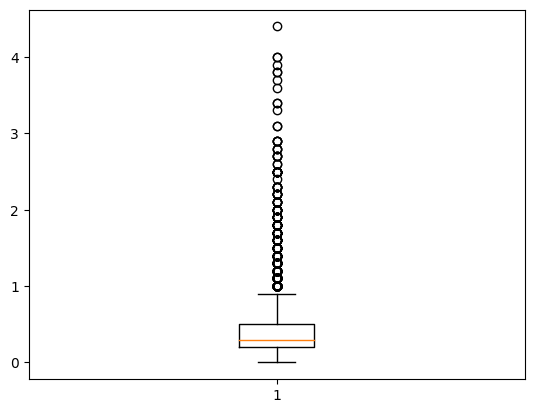

In [127]:
monox_carbon_fig, monox_carbon_ax = plt.subplots()
monox_carbon_ax.boxplot(monox_carbon.value)

### Dióxido de nitrogênio

In [128]:
diox_nitrogen["value"].describe()

count    8554.000000
mean       25.829437
std        19.284356
min         0.000000
25%        11.000000
50%        22.000000
75%        36.000000
max       144.000000
Name: value, dtype: float64

#### Número de outliers

In [129]:
diox_nitrogen_q1,diox_nitrogen_q3 = np.quantile(diox_nitrogen["value"].dropna(), [0.25,0.75])
diox_nitrogen_iqr = diox_nitrogen_q3 - diox_nitrogen_q1 #distancia interquartil
diox_nitrogen[diox_nitrogen.value > diox_nitrogen_q3 + 1.5*diox_nitrogen_iqr].count()

location                  223
city                      223
country                   223
pollutant                 223
value                     223
timestamp                 223
unit                      223
source_name               223
latitude                  223
longitude                 223
averaged_over_in_hours    223
location_geom             223
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9a8e4b97e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9a8e4bb010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9a8e4ba950>],
 'medians': [<matplotlib.lines.Line2D at 0x7b9a8e4bb550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b9a8e4bb7f0>],
 'means': []}

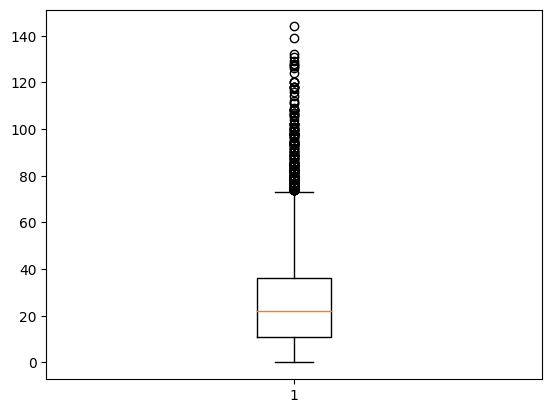

In [130]:
diox_nitrogen_fig, diox_nitrogen_ax = plt.subplots()
diox_nitrogen_ax.boxplot(diox_nitrogen.value)

### Dióxido de enxofre

In [131]:
diox_sulfur["value"].describe()

count    3689.000000
mean        4.972892
std         9.679872
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       114.000000
Name: value, dtype: float64

#### Número de outliers

In [132]:
diox_sulfur_q1,diox_sulfur_q3 = np.quantile(diox_sulfur["value"].dropna(), [0.25,0.75])
diox_sulfur_iqr = diox_sulfur_q3 - diox_sulfur_q1 #distancia interquartil
diox_sulfur[diox_sulfur.value > diox_sulfur_q3 + 1.5*diox_sulfur_iqr].count()

location                  494
city                      494
country                   494
pollutant                 494
value                     494
timestamp                 494
unit                      494
source_name               494
latitude                  494
longitude                 494
averaged_over_in_hours    494
location_geom             494
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9a8c30f010>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9a8c30f550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9a8c30ed70>],
 'medians': [<matplotlib.lines.Line2D at 0x7b9a8c30fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b9a8c30fd30>],
 'means': []}

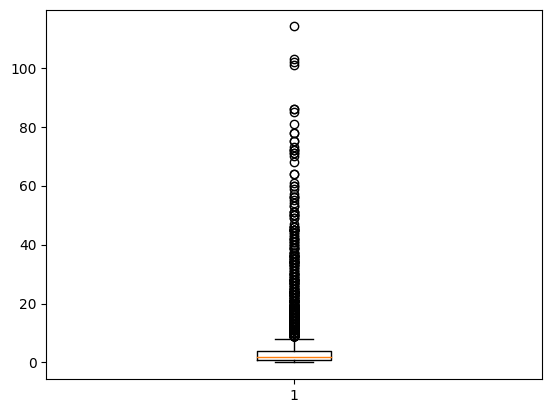

In [133]:
diox_sulfur_fig, diox_sulfur_ax = plt.subplots()
diox_sulfur_ax.boxplot(diox_sulfur.value)

### PM10

In [134]:
pm10["value"].describe()

count    13844.000000
mean        29.305548
std         23.787380
min          0.000000
25%         14.000000
50%         24.000000
75%         38.000000
max        454.000000
Name: value, dtype: float64

#### Número de outliers

In [135]:
pm10_q1,pm10_q3 = np.quantile(pm10["value"].dropna(), [0.25,0.75])
pm10_iqr = pm10_q3 - pm10_q1 #distancia interquartil
pm10[pm10.value > pm10_q3 + 1.5*pm10_iqr].count()

location                  637
city                      637
country                   637
pollutant                 637
value                     637
timestamp                 637
unit                      637
source_name               637
latitude                  637
longitude                 637
averaged_over_in_hours    637
location_geom             637
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9a8c36a230>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9a8c36a770>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9a8c369f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7b9a8c36acb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b9a8c36af50>],
 'means': []}

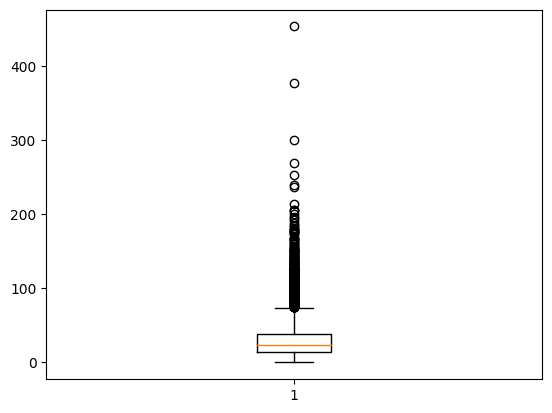

In [136]:
pm10_fig, pm10_ax = plt.subplots()
pm10_ax.boxplot(pm10.value)

### PM2.5

In [137]:
pm25["value"].describe()

count    8944.000000
mean       14.018225
std        14.929931
min         0.000000
25%         6.000000
50%        11.000000
75%        18.000000
max       862.000000
Name: value, dtype: float64

#### Número de outliers

In [138]:
pm25_q1,pm25_q3 = np.quantile(pm25["value"].dropna(), [0.25,0.75])
pm25_iqr = pm25_q3 - pm25_q1 #distancia interquartil
pm25[pm25.value > pm25_q3 + 1.5*pm25_iqr].count()

location                  376
city                      376
country                   376
pollutant                 376
value                     376
timestamp                 376
unit                      376
source_name               376
latitude                  376
longitude                 376
averaged_over_in_hours    376
location_geom             376
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7b9a8c3c0c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7b9a8c3c1150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b9a8c3c0970>],
 'medians': [<matplotlib.lines.Line2D at 0x7b9a8c3c1690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b9a8c3c1930>],
 'means': []}

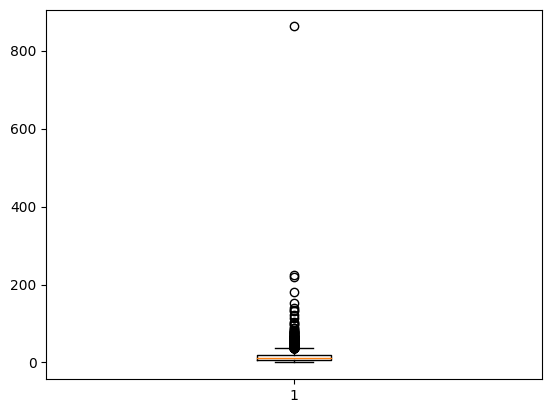

In [139]:
pm25_fig, pm25_ax = plt.subplots()
pm25_ax.boxplot(pm25.value)

# Mais visulizações

In [140]:
import seaborn as sns

In [141]:
df_mean.reset_index(inplace = True)

In [142]:
df_mean.head()

,ano,pollutant,value
0,2017,co,0.688000
1,2017,no2,37.517241
2,2017,o3,75.296296
3,2017,pm10,41.438596
4,2017,pm25,33.136364


## Média emissão versus Poluente

<Axes: xlabel='pollutant', ylabel='value'>

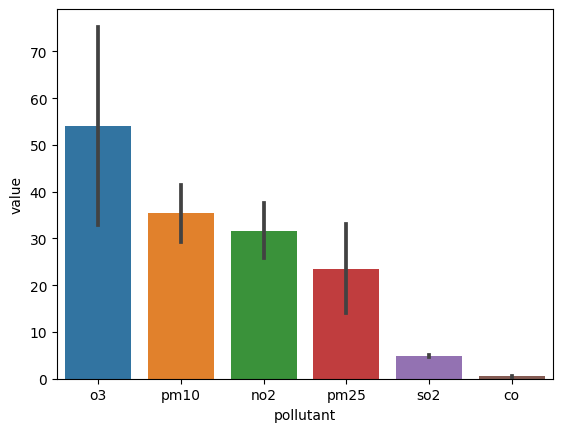

In [143]:
sns.barplot(x='pollutant', y='value',data=df_mean.sort_values(by='value', ascending=False))

## Total emissão versus Poluente

<Axes: xlabel='pollutant', ylabel='value'>

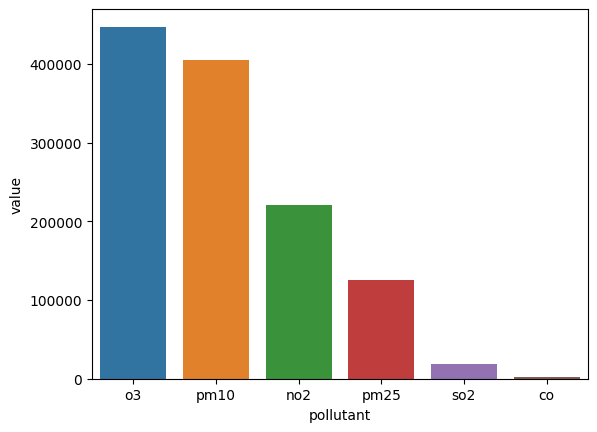

In [144]:
sns.barplot(x='pollutant', y='value',data=df_sum.sort_values(by='value', ascending=False))

### Visualizações por cidade

#### Ozônio

In [145]:
df_mean_ozonio.head()

,index,location,pollutant,value
0,0,Americana,o3,102.000000
1,1,Araraquara,o3,138.000000
2,2,Araçatuba,o3,40.050808
3,3,Bauru,o3,32.731308
4,4,Campinas-Taquaral,o3,40.135468


<Axes: xlabel='location', ylabel='value'>

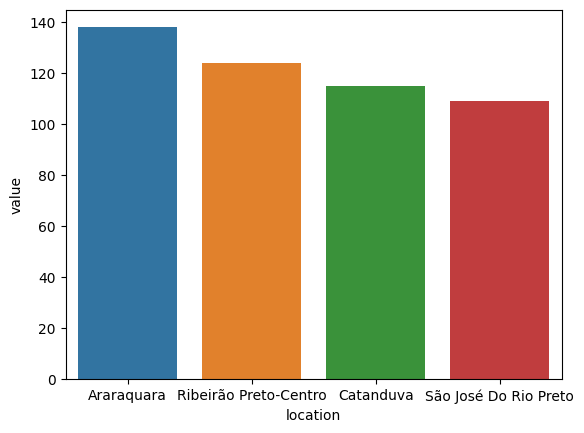

In [146]:
sns.barplot(x='location', y='value',data=df_mean_ozonio.sort_values(by='value', ascending=False).head(4))

#### Monóxido de carbono

<Axes: xlabel='location', ylabel='value'>

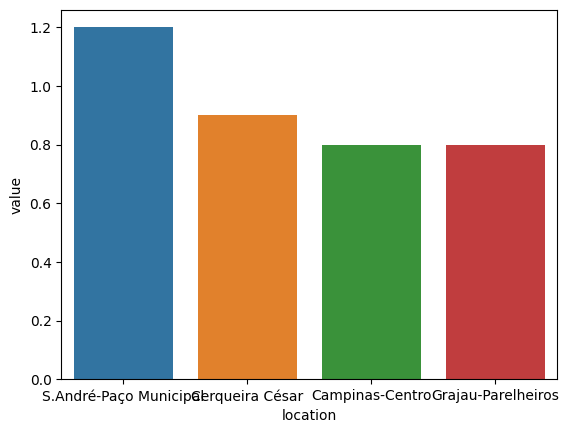

In [147]:
sns.barplot(x='location', y='value',data=df_mean_monox_carbon.sort_values(by='value', ascending=False).head(4))

#### Dióxido de nitrogênio

<Axes: xlabel='location', ylabel='value'>

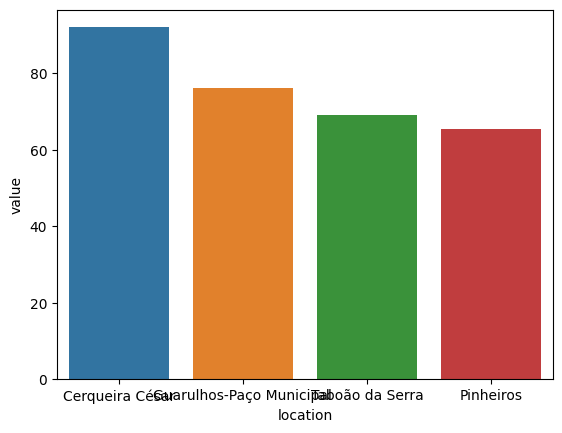

In [148]:
sns.barplot(x='location', y='value',data=df_mean_diox_nitrogen.sort_values(by='value', ascending=False).head(4))

#### Dióxido de enxofre

<Axes: xlabel='location', ylabel='value'>

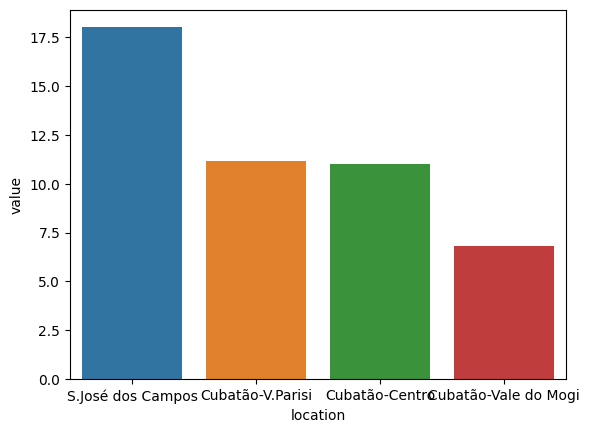

In [149]:
sns.barplot(x='location', y='value',data=df_mean_diox_sulfur.sort_values(by='value', ascending=False).head(4))

#### PM10

<Axes: xlabel='location', ylabel='value'>

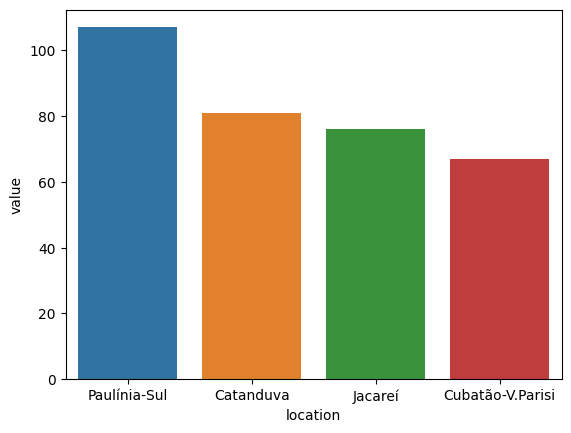

In [150]:
sns.barplot(x='location', y='value',data=df_mean_pm10.sort_values(by='value', ascending=False).head(4))

#### PM2.5

<Axes: xlabel='location', ylabel='value'>

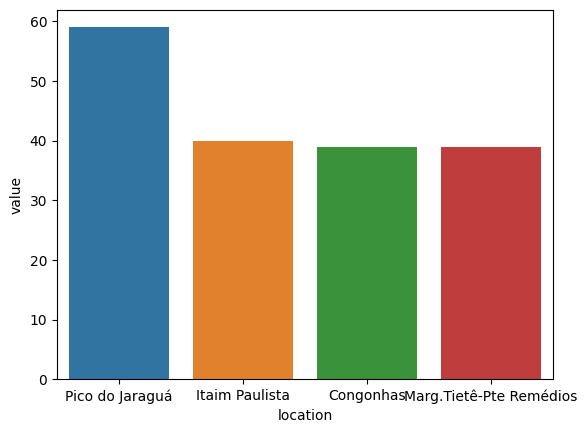

In [151]:
sns.barplot(x='location', y='value',data=df_mean_pm25.sort_values(by='value', ascending=False).head(4))